<a href="https://colab.research.google.com/github/SarkarPriyanshu/DataScienceAssign/blob/main/Healthcare_Dataset_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d prasad22/healthcare-dataset

Saving kaggle.json to kaggle.json
  0% 0.00/483k [00:00<?, ?B/s]
100% 483k/483k [00:00<00:00, 98.1MB/s]


In [2]:
import zipfile
import os

for file in os.listdir():
    if file.endswith("healthcare-dataset.zip"):
        with zipfile.ZipFile(file, "r") as zip_file:
            zip_file.extractall()


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


import warnings
warnings.filterwarnings("ignore")

# Basic Analysis

In [4]:
dtypes = {'Test Results': 'category', 'Medication': 'category', 'Admission Type': 'category'}
parse_dates = ['Date of Admission', 'Discharge Date']
df = pd.read_csv('/content/healthcare_dataset.csv', parse_dates=parse_dates, dtype=dtypes)

In [5]:
df.shape

(10000, 15)

In [6]:
df.sample(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
561,Martin Hines,67,Female,AB+,Diabetes,2020-04-11,Mr. Samuel Garcia,Ramos PLC,Blue Cross,31263.338123,359,Urgent,2020-04-21,Penicillin,Abnormal
6037,Jesse Brown,67,Female,B+,Diabetes,2021-08-04,Janet Wilson,"Morales, Johnson and Campbell",Cigna,5077.834232,467,Elective,2021-08-27,Lipitor,Normal
7483,Cynthia Smith,43,Male,O+,Cancer,2019-06-16,Walter Lucas DVM,Harris and Sons,Aetna,22790.376840,239,Elective,2019-06-24,Aspirin,Inconclusive
8413,Joseph Rodriguez,43,Female,A+,Cancer,2019-07-30,Austin Jackson,"Lucas, Delgado and Brown",UnitedHealthcare,31513.064886,295,Elective,2019-08-23,Paracetamol,Normal
230,Wanda Moore MD,43,Male,A-,Hypertension,2021-03-20,Mark Barnes,Stevens-Patterson,Aetna,19660.006934,179,Elective,2021-04-03,Penicillin,Inconclusive


In [7]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                10000 non-null  object        
 1   Age                 10000 non-null  int64         
 2   Gender              10000 non-null  object        
 3   Blood Type          10000 non-null  object        
 4   Medical Condition   10000 non-null  object        
 5   Date of Admission   10000 non-null  datetime64[ns]
 6   Doctor              10000 non-null  object        
 7   Hospital            10000 non-null  object        
 8   Insurance Provider  10000 non-null  object        
 9   Billing Amount      10000 non-null  float64       
 10  Room Number         10000 non-null  int64         
 11  Admission Type      10000 non-null  category      
 12  Discharge Date      10000 non-null  datetime64[ns]
 13  Medication          10000 non-null  category   

In [8]:
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Name,10000,9378,Michael Johnson,7,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,NaT,NaT,51.4522,19.588974,18.0,35.0,52.0,68.0,85.0
Gender,10000,2,Female,5075,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blood Type,10000,8,AB-,1275,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medical Condition,10000,6,Asthma,1708,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Admission,10000,1815,2019-04-12 00:00:00,15,2018-10-30,2023-10-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Doctor,10000,9416,Michael Johnson,7,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hospital,10000,8639,Smith PLC,19,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Insurance Provider,10000,5,Cigna,2040,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Billing Amount,10000.0,NaN,NaN,NaN,NaT,NaT,25516.806778,14067.292709,1000.180837,13506.523967,25258.112566,37733.913727,49995.902283


In [9]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [10]:
df.duplicated().sum()

0

# EDA

- Is there any siginifcant relation between Age and Billing Amount feature with Target column ?

In [11]:
eda_df = df.drop(['Name','Hospital','Doctor','Room Number'],axis=1)

In [12]:
eda_df.sample(5)

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
8892,36,Male,B+,Asthma,2019-06-06,Cigna,27717.007452,Urgent,2019-06-15,Paracetamol,Abnormal
9800,65,Male,O+,Asthma,2023-02-13,Medicare,44948.769882,Emergency,2023-03-15,Penicillin,Inconclusive
4904,74,Male,AB-,Arthritis,2020-02-25,UnitedHealthcare,5236.784454,Elective,2020-03-09,Aspirin,Normal
1893,55,Male,A+,Asthma,2020-05-29,UnitedHealthcare,29718.083613,Urgent,2020-06-10,Penicillin,Normal
8172,26,Male,A+,Obesity,2021-05-01,Blue Cross,5196.805678,Emergency,2021-05-22,Ibuprofen,Inconclusive


In [13]:
print(f'What are the average age of patiences : {eda_df["Age"].mean()}')
print(f'What are the median age of patiences : {eda_df["Age"].median()}')

What are the average age of patiences : 51.4522
What are the median age of patiences : 52.0


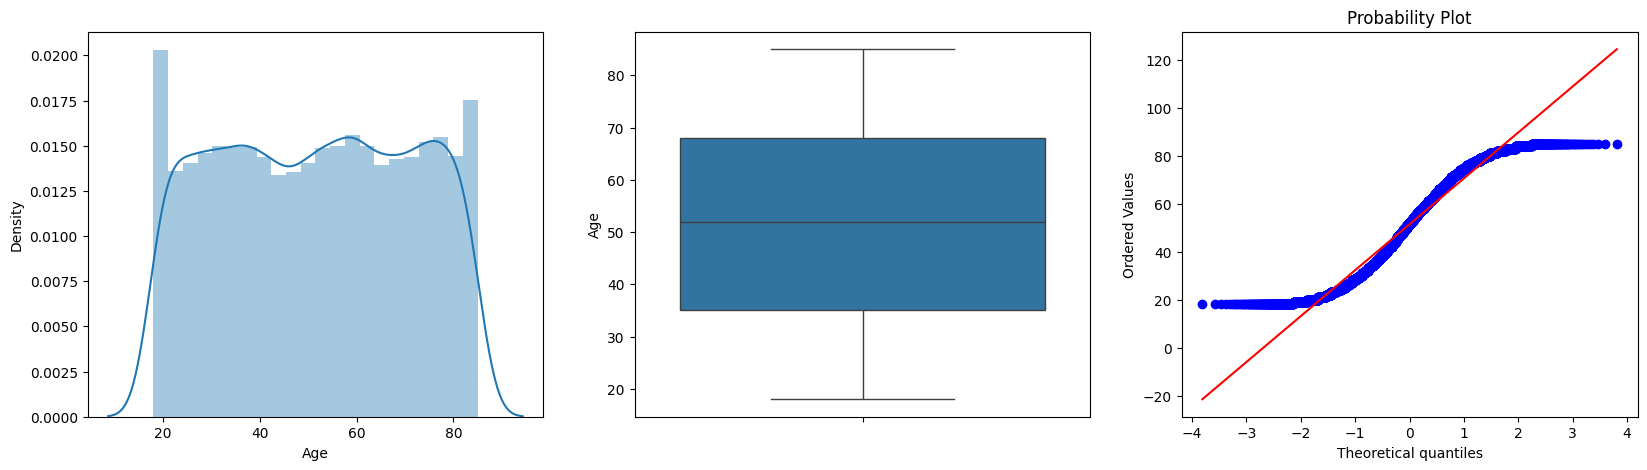

In [14]:
fig,ax = plt.subplots(1,3,figsize=(20,5))

sns.distplot(eda_df['Age'],ax=ax[0])
sns.boxplot(eda_df['Age'],ax=ax[1])
stats.probplot(eda_df['Age'],plot=ax[2])

plt.show()

- Age columns distribution is uniform
- No outliers

In [21]:
eda_df \
.groupby(['Test Results']) \
.agg({'Age':['mean','median','max','min','std','var','count']}) \
.reset_index() \
.style.background_gradient(cmap ='coolwarm')

In [16]:
print(f'What are the average Billing Amount of patiences : {eda_df["Billing Amount"].mean()}')
print(f'What are the median Billing Amount of patiences : {eda_df["Billing Amount"].median()}')

What are the average Billing Amount of patiences : 25516.8067777384
What are the median Billing Amount of patiences : 25258.112566373504


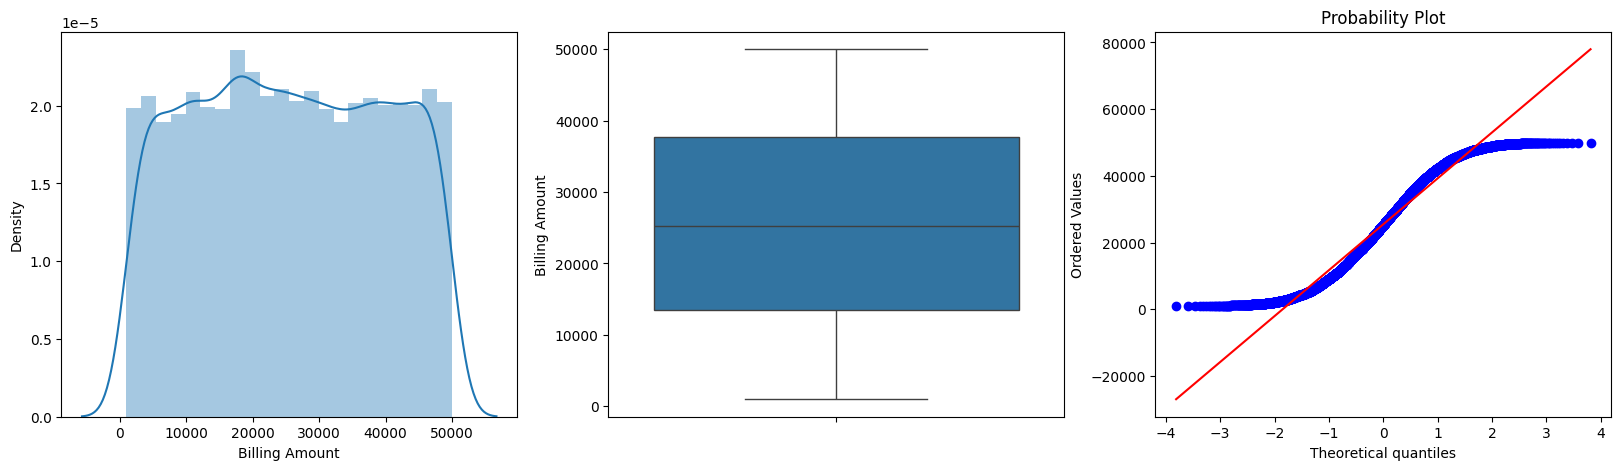

In [17]:
fig,ax = plt.subplots(1,3,figsize=(20,5))

sns.distplot(eda_df['Billing Amount'],ax=ax[0])
sns.boxplot(eda_df['Billing Amount'],ax=ax[1])
stats.probplot(eda_df['Billing Amount'],plot=ax[2])

plt.show()

- Billing Amount columns distribution is uniform
- No outliers

In [22]:
eda_df \
.groupby(['Test Results']) \
.agg({'Billing Amount':['mean','median','max','min','std','var','count']}) \
.reset_index() \
.style.background_gradient(cmap ='coolwarm', axis=0)

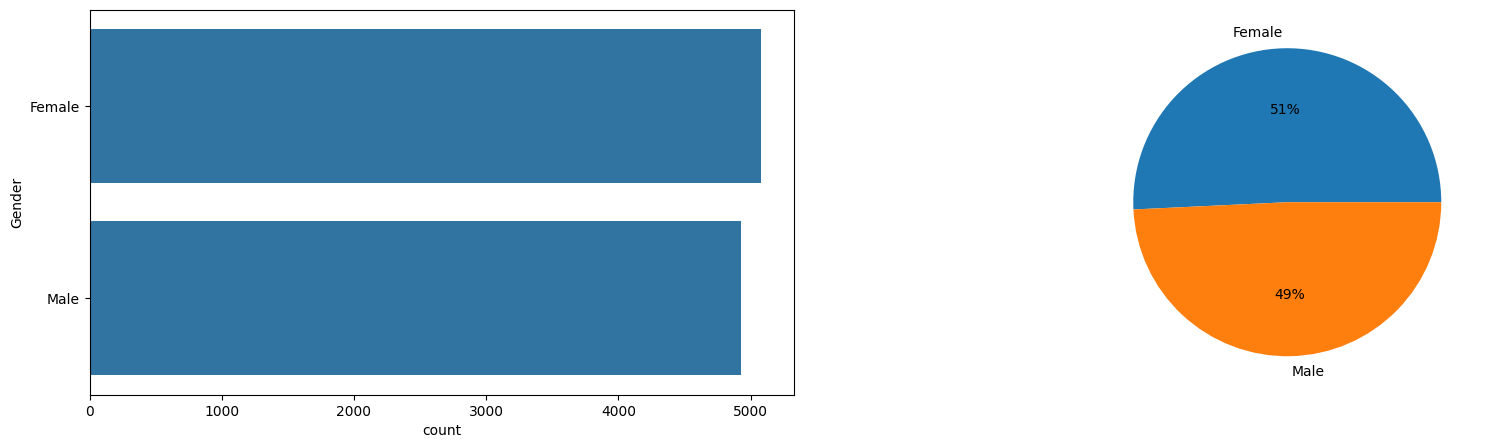

In [28]:
fig,ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(eda_df['Gender'],ax=ax[0])
value,label = eda_df['Gender'].value_counts().values,eda_df['Gender'].value_counts().index

ax[1].pie(value, labels=label, autopct='%.0f%%')

plt.show()

In [86]:
eda_df \
.groupby(['Test Results', 'Gender']) \
.agg({'Gender': 'count'}) \
.rename(columns={'Gender':'count'}) \
.reset_index() \
.sort_values(['Test Results','count'],ascending=[True,False]) \
.style.background_gradient(cmap ='coolwarm', axis=0)

,Test Results,Gender,count
1,Abnormal,Male,1740
0,Abnormal,Female,1716
2,Inconclusive,Female,1696
3,Inconclusive,Male,1581
4,Normal,Female,1663
5,Normal,Male,1604


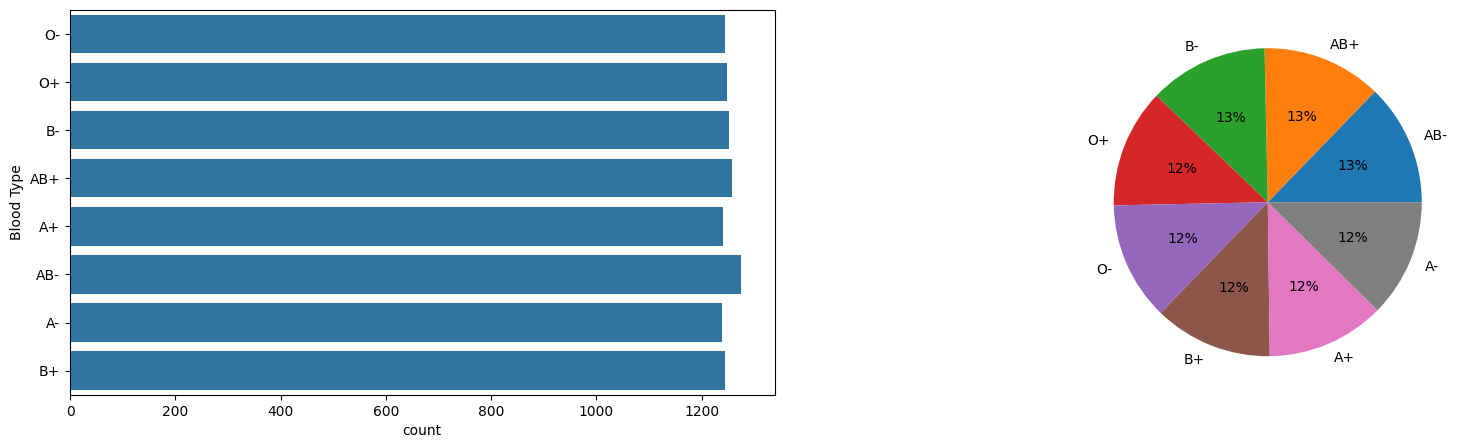

In [52]:
fig,ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(eda_df['Blood Type'],ax=ax[0])
value,label = eda_df['Blood Type'].value_counts().values,eda_df['Blood Type'].value_counts().index

ax[1].pie(value, labels=label, autopct='%.0f%%')

plt.show()

In [85]:
eda_df \
.groupby(['Test Results', 'Blood Type']) \
.agg({'Blood Type': 'count'}) \
.rename(columns={'Blood Type':'count'}) \
.reset_index() \
.sort_values(['Test Results','count'],ascending=[True,False]) \
.style.background_gradient(cmap ='coolwarm', axis=0)

,Test Results,Blood Type,count
5,Abnormal,B-,456
3,Abnormal,AB-,449
1,Abnormal,A-,437
2,Abnormal,AB+,432
7,Abnormal,O-,432
4,Abnormal,B+,422
6,Abnormal,O+,417
0,Abnormal,A+,411
10,Inconclusive,AB+,427
14,Inconclusive,O+,427


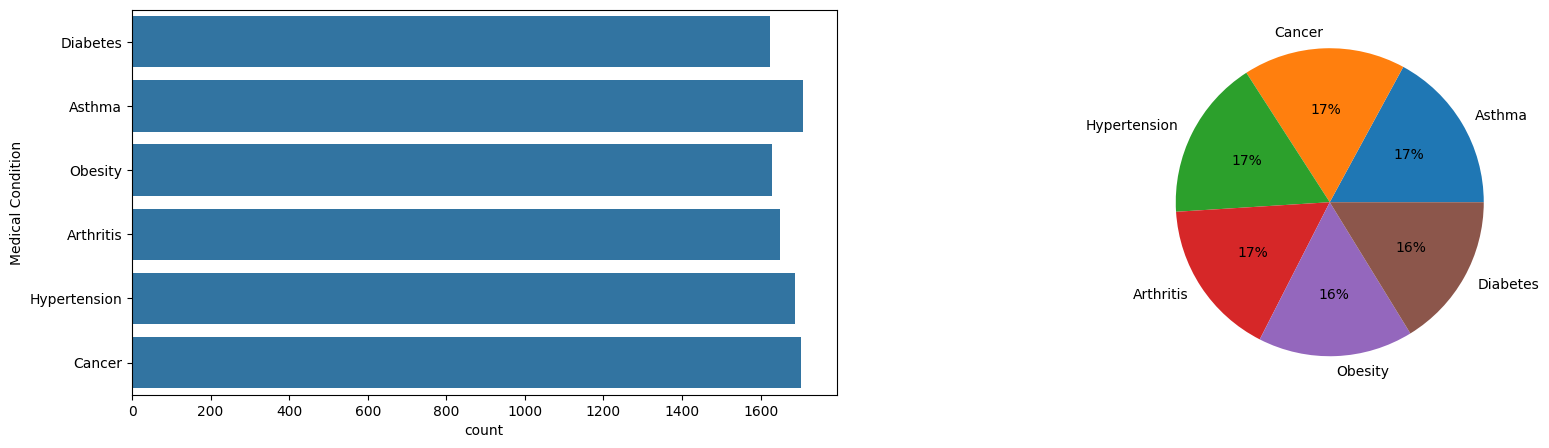

In [80]:
fig,ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(eda_df['Medical Condition'],ax=ax[0])
value,label = eda_df['Medical Condition'].value_counts().values,eda_df['Medical Condition'].value_counts().index

ax[1].pie(value, labels=label, autopct='%.0f%%')

plt.show()

In [87]:
eda_df \
.groupby(['Test Results', 'Medical Condition']) \
.agg({'Medical Condition': 'count'}) \
.rename(columns={'Medical Condition':'count'}) \
.reset_index() \
.sort_values(['Test Results','count'],ascending=[True,False]) \
.style.background_gradient(cmap ='coolwarm', axis=0)

,Test Results,Medical Condition,count
1,Abnormal,Asthma,623
4,Abnormal,Hypertension,602
2,Abnormal,Cancer,577
5,Abnormal,Obesity,562
0,Abnormal,Arthritis,555
3,Abnormal,Diabetes,537
8,Inconclusive,Cancer,556
10,Inconclusive,Hypertension,554
6,Inconclusive,Arthritis,553
7,Inconclusive,Asthma,551


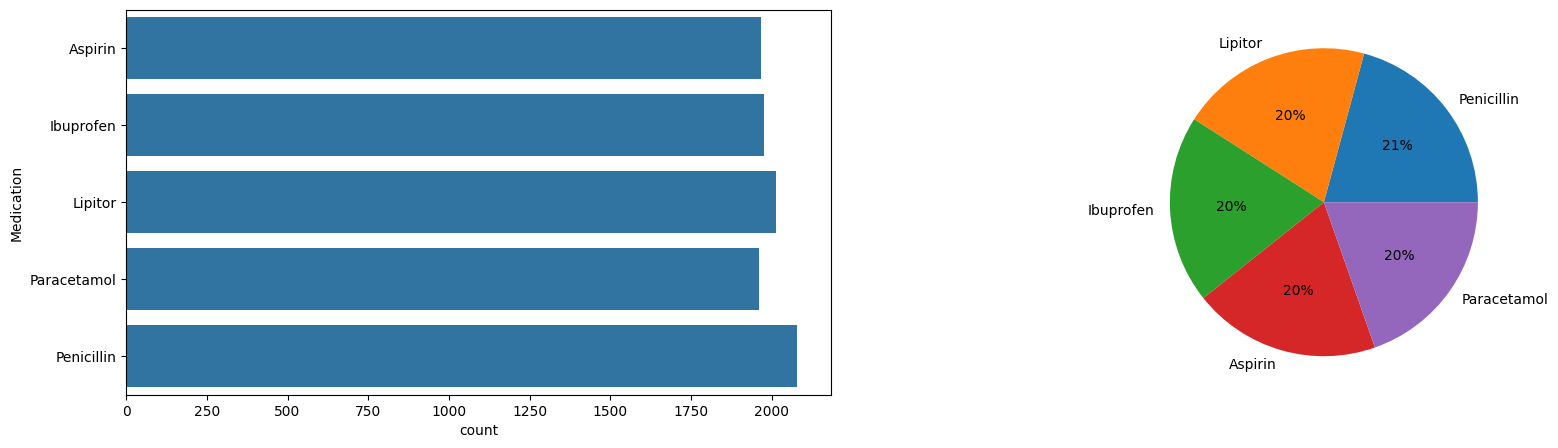

In [83]:
fig,ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(eda_df['Medication'],ax=ax[0])
value,label = eda_df['Medication'].value_counts().values,eda_df['Medication'].value_counts().index

ax[1].pie(value, labels=label, autopct='%.0f%%')

plt.show()

In [88]:
eda_df \
.groupby(['Test Results', 'Medication']) \
.agg({'Medication': 'count'}) \
.rename(columns={'Medication':'count'}) \
.reset_index() \
.sort_values(['Test Results','count'],ascending=[True,False]) \
.style.background_gradient(cmap ='coolwarm', axis=0)

,Test Results,Medication,count
2,Abnormal,Lipitor,721
4,Abnormal,Penicillin,716
3,Abnormal,Paracetamol,685
1,Abnormal,Ibuprofen,680
0,Abnormal,Aspirin,654
7,Inconclusive,Lipitor,685
9,Inconclusive,Penicillin,680
8,Inconclusive,Paracetamol,651
5,Inconclusive,Aspirin,634
6,Inconclusive,Ibuprofen,627


In [112]:
eda_df \
.groupby(['Test Results','Medical Condition','Gender']) \
.agg({'Medication': 'count'}) \
.rename(columns={'Medication':'count'}) \
.reset_index() \
.sort_values(['Test Results','Gender','count',],ascending=[True,True,False]) \
.style.background_gradient(cmap ='coolwarm', axis=0)

,Test Results,Medical Condition,Gender,count
2,Abnormal,Asthma,Female,320
4,Abnormal,Cancer,Female,300
10,Abnormal,Obesity,Female,281
0,Abnormal,Arthritis,Female,273
8,Abnormal,Hypertension,Female,272
6,Abnormal,Diabetes,Female,270
9,Abnormal,Hypertension,Male,330
3,Abnormal,Asthma,Male,303
1,Abnormal,Arthritis,Male,282
11,Abnormal,Obesity,Male,281


In [108]:
eda_df \
.groupby(['Test Results', 'Medication','Medical Condition','Gender']) \
.agg({'Medication': 'count'}) \
.rename(columns={'Medication':'count'}) \
.reset_index() \
.query("`Medication` == 'Lipitor' and `Test Results` == 'Abnormal'") \
.sort_values(['Gender','count',],ascending=[True,False])

,Test Results,Medication,Medical Condition,Gender,count
32,Abnormal,Lipitor,Hypertension,Female,68
30,Abnormal,Lipitor,Diabetes,Female,66
26,Abnormal,Lipitor,Asthma,Female,64
28,Abnormal,Lipitor,Cancer,Female,59
34,Abnormal,Lipitor,Obesity,Female,52
24,Abnormal,Lipitor,Arthritis,Female,47
25,Abnormal,Lipitor,Arthritis,Male,65
29,Abnormal,Lipitor,Cancer,Male,65
33,Abnormal,Lipitor,Hypertension,Male,64
31,Abnormal,Lipitor,Diabetes,Male,63
